In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import tkinter as tk
from tkinter import filedialog as fd

import collections

In [91]:
from datetime import datetime

In [2]:
from docxtpl import DocxTemplate
import docxtpl
from docx.shared import Mm

In [3]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [4]:
file_name

'D:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - AVANCE COSECHA/2023/ANALISIS DE CAÑA EN CAMPO 2023/REPORTE_AVANCE_COSECHA/SHP/cosecha090623.shp'

In [5]:
catastro_avance = gpd.read_file(file_name)

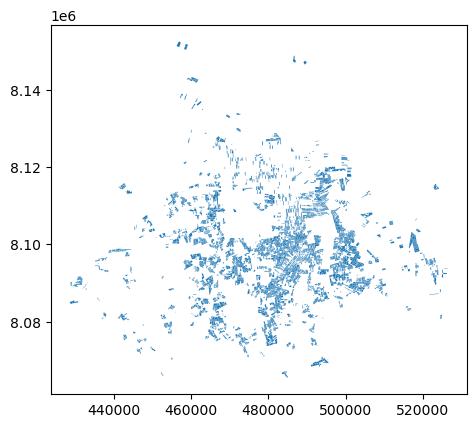

In [6]:
catastro_avance.plot()
plt.show()

In [7]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".xlsx", ".xlsx")])
root.destroy()

In [8]:
file_name

'D:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - AVANCE COSECHA/2023/ANALISIS DE CAÑA EN CAMPO 2023/REPORTE_AVANCE_COSECHA/RENDIMIENTO AVANCE 090623.xlsx'

In [9]:
data_avance = pd.read_excel(file_name)

C:\Users\UTEA\anaconda3\envs\informes_utea\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\UTEA\anaconda3\envs\informes_utea\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [10]:
data_avance.head(3)

,INS,GRUPO,COD COS,CODIGO CAÑERO,NOMBRE CAÑERO,TN COMPROMISO GRUPAL,TN COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,TN ENTREGA GRUPAL,...,% ENTREGA GRUPAL,HA COSECHA GRUPAL,COSECHA NAX,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2023,RENDIMIENTO 2022,RENDIMIENTO 2021,DIFERENCIA,OBSERVACION
0,50,1.0,30,75,AGUILERA TARADELLES NELSON MARIANO,65493.32,26992.97,857.64,525.40,15870.41,...,0.242321,154.04,NaN,95.65,0.179609,103.02785,72.361904,78.099309,0.062712,NO CUBIERTO
1,50,1.0,30,577,AGUILERA MARIA INGRID WENDE DE,65493.32,13433.25,857.64,205.82,15870.41,...,0.242321,154.04,NaN,58.39,0.179609,103.02785,72.361904,78.099309,0.062712,NO CUBIERTO
2,50,1.0,30,794,AGUILERA WENDE MARIANO,65493.32,18084.70,857.64,92.60,15870.41,...,0.242321,154.04,NaN,0.00,0.179609,103.02785,72.361904,78.099309,0.062712,NO CUBIERTO


In [11]:
data_avance.columns

Index(['INS', 'GRUPO', 'COD COS', 'CODIGO CAÑERO ', 'NOMBRE CAÑERO',
       'TN COMPROMISO GRUPAL', 'TN COMPROMISO INDIVIDUAL',
       'HA CANHA POR GRUPO', 'HA CANHA INDIVIDUAL', 'TN ENTREGA GRUPAL',
       'TN ENTREGA INDIVIDUAL', '% ENTREGA GRUPAL', 'HA COSECHA GRUPAL',
       'COSECHA NAX', 'HA COSECHA INDIVIDUAL', '% COSECHA GRUPAL',
       'RENDIMIENTO 2023', 'RENDIMIENTO 2022', 'RENDIMIENTO 2021',
       'DIFERENCIA', 'OBSERVACION'],
      dtype='object')

In [12]:
# extraer codigos de cosecha
codigos_cosecha = list(set(data_avance['COD COS']))

In [13]:
print(codigos_cosecha)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,

In [14]:
cod_co = 30
cod_co

30

In [15]:
grupo = data_avance[data_avance['COD COS'] == cod_co]

In [16]:
grupo

,INS,GRUPO,COD COS,CODIGO CAÑERO,NOMBRE CAÑERO,TN COMPROMISO GRUPAL,TN COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,TN ENTREGA GRUPAL,...,% ENTREGA GRUPAL,HA COSECHA GRUPAL,COSECHA NAX,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2023,RENDIMIENTO 2022,RENDIMIENTO 2021,DIFERENCIA,OBSERVACION
0,50,1.0,30,75,AGUILERA TARADELLES NELSON MARIANO,65493.32,26992.97,857.64,525.40,15870.41,...,0.242321,154.04,NaN,95.65,0.179609,103.02785,72.361904,78.099309,0.062712,NO CUBIERTO
1,50,1.0,30,577,AGUILERA MARIA INGRID WENDE DE,65493.32,13433.25,857.64,205.82,15870.41,...,0.242321,154.04,NaN,58.39,0.179609,103.02785,72.361904,78.099309,0.062712,NO CUBIERTO
2,50,1.0,30,794,AGUILERA WENDE MARIANO,65493.32,18084.70,857.64,92.60,15870.41,...,0.242321,154.04,NaN,0.00,0.179609,103.02785,72.361904,78.099309,0.062712,NO CUBIERTO
3,50,1.0,30,8005,AGUILERA WENDE MARIA INGRID,65493.32,5201.02,857.64,33.82,15870.41,...,0.242321,154.04,NaN,0.00,0.179609,103.02785,72.361904,78.099309,0.062712,NO CUBIERTO
4,50,1.0,30,41715,VACA DIEZ UGARTE NICOLAS,65493.32,1781.38,857.64,0.00,15870.41,...,0.242321,154.04,NaN,0.00,0.179609,103.02785,72.361904,78.099309,0.062712,NO CUBIERTO


In [17]:
lista_ca = grupo[['CODIGO CAÑERO ', 'COD COS', 'NOMBRE CAÑERO', 'TN COMPROMISO INDIVIDUAL', 'TN ENTREGA INDIVIDUAL']]
lista_ca

,CODIGO CAÑERO,COD COS,NOMBRE CAÑERO,TN COMPROMISO INDIVIDUAL,TN ENTREGA INDIVIDUAL
0,75,30,AGUILERA TARADELLES NELSON MARIANO,26992.97,0.00
1,577,30,AGUILERA MARIA INGRID WENDE DE,13433.25,631.64
2,794,30,AGUILERA WENDE MARIANO,18084.70,15218.32
3,8005,30,AGUILERA WENDE MARIA INGRID,5201.02,20.45
4,41715,30,VACA DIEZ UGARTE NICOLAS,1781.38,0.00


In [18]:
catastro_avance.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,soca,cultivo,zona,area,semana,fc,fsi,estado,geometry
0,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,4,canha,79,0.77,0,None,0,sin cosech,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,4,canha,79,2.30,0,None,0,sin cosech,"POLYGON Z ((492267.796 8084944.479 0.000, 4923..."
2,00005600000L6.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L6.2,UCG_90-20,2018-05-20,4,canha,79,6.51,0,None,0,sin cosech,"POLYGON Z ((492296.840 8084909.501 0.000, 4922..."


In [19]:
lista_ca = lista_ca.rename(columns={'CODIGO CAÑERO ': 'cod_ca'})

In [20]:
lista_ca

,cod_ca,COD COS,NOMBRE CAÑERO,TN COMPROMISO INDIVIDUAL,TN ENTREGA INDIVIDUAL
0,75,30,AGUILERA TARADELLES NELSON MARIANO,26992.97,0.00
1,577,30,AGUILERA MARIA INGRID WENDE DE,13433.25,631.64
2,794,30,AGUILERA WENDE MARIANO,18084.70,15218.32
3,8005,30,AGUILERA WENDE MARIA INGRID,5201.02,20.45
4,41715,30,VACA DIEZ UGARTE NICOLAS,1781.38,0.00


In [21]:
lista_ca['avance_porcen'] = (lista_ca['TN ENTREGA INDIVIDUAL'] / lista_ca['TN COMPROMISO INDIVIDUAL'])*100

## COMPROMISO Y ENTREGAS

In [22]:
lista_ca

,cod_ca,COD COS,NOMBRE CAÑERO,TN COMPROMISO INDIVIDUAL,TN ENTREGA INDIVIDUAL,avance_porcen
0,75,30,AGUILERA TARADELLES NELSON MARIANO,26992.97,0.00,0.000000
1,577,30,AGUILERA MARIA INGRID WENDE DE,13433.25,631.64,4.702064
2,794,30,AGUILERA WENDE MARIANO,18084.70,15218.32,84.150249
3,8005,30,AGUILERA WENDE MARIA INGRID,5201.02,20.45,0.393192
4,41715,30,VACA DIEZ UGARTE NICOLAS,1781.38,0.00,0.000000


In [82]:
total_lista_ca = {
    'total_compromiso':lista_ca['TN COMPROMISO INDIVIDUAL'].sum(),
    'total_entrega':lista_ca['TN ENTREGA INDIVIDUAL'].sum(),
    'total_avance_porcen':lista_ca['TN ENTREGA INDIVIDUAL'].sum() / lista_ca['TN COMPROMISO INDIVIDUAL'].sum()
}

In [83]:
total_lista_ca

{'total_compromiso': 65493.32,
 'total_entrega': 15870.41,
 'total_avance_porcen': 0.24232104892529496}

In [23]:
catastro_avance = catastro_avance.rename(columns={'unidad_03':'cod_ca'})
catastro_avance.head(3)

,id,unidad_01,unidad_02,cod_ca,unidad_04,unidad_05,variedad,fs,soca,cultivo,zona,area,semana,fc,fsi,estado,geometry
0,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,2018-05-30,4,canha,79,0.77,0,None,0,sin cosech,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,2018-05-20,4,canha,79,2.30,0,None,0,sin cosech,"POLYGON Z ((492267.796 8084944.479 0.000, 4923..."
2,00005600000L6.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L6.2,UCG_90-20,2018-05-20,4,canha,79,6.51,0,None,0,sin cosech,"POLYGON Z ((492296.840 8084909.501 0.000, 4922..."


In [24]:
catastro_merge = pd.merge(lista_ca, catastro_avance, on='cod_ca')

In [25]:
catastro_merge['area_cosechada'] = catastro_merge.apply(lambda row : row['area'] if row['estado'] == 'cosechado' else 0, axis=1)

In [26]:
catastro_merge['avance_mes'] = catastro_merge.apply(lambda row : row['area'] if row['fc']!=None and row['fc'].split('-')[1] == '06' else 0, axis=1)

In [49]:
avance_sat = catastro_merge.groupby(['unidad_01', 'unidad_02'])[['area', 'area_cosechada', 'avance_mes']].sum()

In [50]:
avance_sat = entregas_sat.reset_index()

In [51]:
avance_sat

,index,unidad_01,unidad_02,area,area_cosechada,avance_mes,%avance
0,0,216,LA_ESTACADA--AGUILERA,226.34,0.00,0.00,0.000000
1,1,217,FLAMBOYAN--AGUILERA,207.46,0.00,0.00,0.000000
2,2,256,LOS_ANDES--AGUILERA,423.24,153.93,40.58,36.369436


In [52]:
avance_sat['%avance'] = avance_sat['area_cosechada'] / avance_sat['area'] * 100

## AVANCE EN PROPIEDADES

In [70]:
avance_sat

,index,unidad_01,unidad_02,area,area_cosechada,avance_mes,%avance
0,0,216,LA_ESTACADA--AGUILERA,226.34,0.00,0.00,0.000000
1,1,217,FLAMBOYAN--AGUILERA,207.46,0.00,0.00,0.000000
2,2,256,LOS_ANDES--AGUILERA,423.24,153.93,40.58,36.369436


In [71]:
total_area = avance_sat['area'].sum()
total_area_cosechada = avance_sat['area_cosechada'].sum()
total_avance_mes = avance_sat['avance_mes'].sum()
total_avance_porcen = total_area_cosechada / total_area * 100

In [74]:
total_avance_sat = {
    'total_area':avance_sat['area'].sum(),
    'total_area_cosechada':avance_sat['area_cosechada'].sum(),
    'total_avance_mes':avance_sat['avance_mes'].sum(),
    'total_avance_porcen':avance_sat['area_cosechada'].sum() / avance_sat['area'].sum() * 100
}

In [75]:
total_avance_sat

{'total_area': 857.04,
 'total_area_cosechada': 153.93,
 'total_avance_mes': 40.58,
 'total_avance_porcen': 17.96065527863344}

## ANALISIS COSECAHDO - ENTREGADO

In [94]:
fecha_inicio = datetime(2023, 5, 5)

In [95]:
fecha_actual = datetime.now()

In [100]:
dias_avance = (fecha_actual - fecha_inicio).days

In [105]:
porcen_tiempo = (dias_avance / 171) * 100

In [106]:
porcen_tiempo

30.994152046783626

In [112]:
data_analisis = {
    'avance_toneladas_%':total_lista_ca['total_avance_porcen'],
    'avance_area_%':total_avance_sat['total_avance_porcen'],
    'porcen_tiempo':porcen_tiempo
}

In [113]:
data_analisis

{'avance_toneladas_%': 0.24232104892529496,
 'avance_area_%': 17.96065527863344,
 'porcen_tiempo': 30.994152046783626}

In [34]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".xlsx", ".xlsx")])
root.destroy()

In [35]:
file_name

'D:/Ingenio Azucarero Guabira S.A/UTEA - SEMANAL - AVANCE COSECHA/2023/ANALISIS DE CAÑA EN CAMPO 2023/REPORTE_AVANCE_COSECHA/ESTIMATIVAS_DB.xlsx'

In [36]:
data_produccion = pd.read_excel(file_name, 'PRODUCCION_POR_PROP')
data_produccion.head(3)

,CODIGO,PROPIEDAD,AREA,NORMAL,OPTIMO,PRODUCCION,TCH
0,1,SONIMA,84.03,4134.610860,4730.356360,4315.814112,51.360396
1,2,JOSE_TREJO--SEGUNDINA_IRIARTE,0.80,29.279646,32.838699,29.279646,36.599557
2,3,PROPIEDAD_ONOFRE,22.92,1322.818055,1533.784336,1667.749710,72.763949


In [75]:
data_produccion.rename(columns={'CODIGO': 'unidad_01'}, inplace=True)

In [76]:
data_produccion[data_produccion['unidad_01'] == 19]

,unidad_01,PROPIEDAD,AREA,NORMAL,OPTIMO,PRODUCCION,TCH
17,19,SANTA_BARBARA,446.11,24796.169194,28740.162126,24796.169194,55.583083


In [77]:
df = grouped_df.merge(data_produccion, on='unidad_01')

In [78]:
df = df[['unidad_01', 'unidad_02', 'area', 'area_cosechada', 'TCH']]
df

,unidad_01,unidad_02,area,area_cosechada,TCH
0,216,LA_ESTACADA--AGUILERA,226.34,0.00,67.544873
1,217,FLAMBOYAN--AGUILERA,207.46,0.00,67.975285
2,256,LOS_ANDES--AGUILERA,423.24,153.93,79.795302


In [79]:
df['sin_cosechar'] = df['area'] - df['area_cosechada']

In [80]:
df

,unidad_01,unidad_02,area,area_cosechada,TCH,sin_cosechar
0,216,LA_ESTACADA--AGUILERA,226.34,0.00,67.544873,226.34
1,217,FLAMBOYAN--AGUILERA,207.46,0.00,67.975285,207.46
2,256,LOS_ANDES--AGUILERA,423.24,153.93,79.795302,269.31


In [81]:
df['produccion_total'] = df['area'] * df['TCH']
df

,unidad_01,unidad_02,area,area_cosechada,TCH,sin_cosechar,produccion_total
0,216,LA_ESTACADA--AGUILERA,226.34,0.00,67.544873,226.34,15288.106548
1,217,FLAMBOYAN--AGUILERA,207.46,0.00,67.975285,207.46,14102.152708
2,256,LOS_ANDES--AGUILERA,423.24,153.93,79.795302,269.31,33772.563435


In [82]:
df['produccion_restante'] = df['sin_cosechar'] * df['TCH']
df

,unidad_01,unidad_02,area,area_cosechada,TCH,sin_cosechar,produccion_total,produccion_restante
0,216,LA_ESTACADA--AGUILERA,226.34,0.00,67.544873,226.34,15288.106548,15288.106548
1,217,FLAMBOYAN--AGUILERA,207.46,0.00,67.975285,207.46,14102.152708,14102.152708
2,256,LOS_ANDES--AGUILERA,423.24,153.93,79.795302,269.31,33772.563435,21489.672665


In [83]:
df['produccion_cosechado'] = df['area_cosechada'] * df['TCH']
df

,unidad_01,unidad_02,area,area_cosechada,TCH,sin_cosechar,produccion_total,produccion_restante,produccion_cosechado
0,216,LA_ESTACADA--AGUILERA,226.34,0.00,67.544873,226.34,15288.106548,15288.106548,0.00000
1,217,FLAMBOYAN--AGUILERA,207.46,0.00,67.975285,207.46,14102.152708,14102.152708,0.00000
2,256,LOS_ANDES--AGUILERA,423.24,153.93,79.795302,269.31,33772.563435,21489.672665,12282.89077


In [84]:
lista_ca

,cod_ca,COD COS,NOMBRE CAÑERO,TN COMPROMISO INDIVIDUAL,TN ENTREGA INDIVIDUAL,avance_porcen
0,75,30,AGUILERA TARADELLES NELSON MARIANO,26992.97,0.00,0.000000
1,577,30,AGUILERA MARIA INGRID WENDE DE,13433.25,631.64,4.702064
2,794,30,AGUILERA WENDE MARIANO,18084.70,15218.32,84.150249
3,8005,30,AGUILERA WENDE MARIA INGRID,5201.02,20.45,0.393192
4,41715,30,VACA DIEZ UGARTE NICOLAS,1781.38,0.00,0.000000


In [85]:
lista_ca.rename(columns={'COD COS':'cod_cos', 'NOMBRE CAÑERO':'nombre_canhero', 'TN COMPROMISO INDIVIDUAL':'tn_compromiso_indiv', 'TN ENTREGA INDIVIDUAL':'tn_entregado_indiv'}, inplace=True)

In [86]:
lista_ca

,cod_ca,cod_cos,nombre_canhero,tn_compromiso_indiv,tn_entregado_indiv,avance_porcen
0,75,30,AGUILERA TARADELLES NELSON MARIANO,26992.97,0.00,0.000000
1,577,30,AGUILERA MARIA INGRID WENDE DE,13433.25,631.64,4.702064
2,794,30,AGUILERA WENDE MARIANO,18084.70,15218.32,84.150249
3,8005,30,AGUILERA WENDE MARIA INGRID,5201.02,20.45,0.393192
4,41715,30,VACA DIEZ UGARTE NICOLAS,1781.38,0.00,0.000000


In [87]:
idmax = lista_ca['tn_compromiso_indiv'].idxmax()

In [88]:
lista_ca.loc[idmax]

cod_ca                                                 75
cod_cos                                                30
nombre_canhero         AGUILERA TARADELLES NELSON MARIANO
tn_compromiso_indiv                              26992.97
tn_entregado_indiv                                    0.0
avance_porcen                                         0.0
Name: 0, dtype: object

In [89]:
cod_ca = lista_ca.loc[idmax]['cod_ca']
nom_ca = lista_ca.loc[idmax]['nombre_canhero']

In [90]:
filename = str(cod_ca) + '_ADC_' + '09-06-2023_' + nom_ca
filename

'75_ADC_09-06-2023_AGUILERA TARADELLES NELSON MARIANO'

In [91]:
df

,unidad_01,unidad_02,area,area_cosechada,TCH,sin_cosechar,produccion_total,produccion_restante,produccion_cosechado
0,216,LA_ESTACADA--AGUILERA,226.34,0.00,67.544873,226.34,15288.106548,15288.106548,0.00000
1,217,FLAMBOYAN--AGUILERA,207.46,0.00,67.975285,207.46,14102.152708,14102.152708,0.00000
2,256,LOS_ANDES--AGUILERA,423.24,153.93,79.795302,269.31,33772.563435,21489.672665,12282.89077


In [92]:
totales = {
    'tn_compromiso': lista_ca['tn_compromiso_indiv'].sum(),
    'tn_entregado': lista_ca['tn_entregado_indiv'].sum(),
    'avance': (lista_ca['tn_entregado_indiv'].sum()  / lista_ca['tn_compromiso_indiv'].sum())*100,
    'area': df['area'].sum(),
    'area_cosechada': df['area_cosechada'].sum(),
    'sin_cosechar': df['sin_cosechar'].sum(),
    'produccion_total': df['produccion_total'].sum(),
    'produccion_restante': df['produccion_restante'].sum(),
    'produccion_cosechado': df['produccion_cosechado'].sum(),
    'fecha': '09/06/2023'
}
total = collections.namedtuple("totales", totales.keys())(*totales.values())

In [93]:
canheros = []
for index, row in lista_ca.iterrows():
    ca = dict(row)
    canheros.append(collections.namedtuple("canhero", ca.keys())(*ca.values()))

In [94]:
canheros

[canhero(cod_ca=75, cod_cos=30, nombre_canhero='AGUILERA TARADELLES NELSON MARIANO', tn_compromiso_indiv=26992.97, tn_entregado_indiv=0.0, avance_porcen=0.0),
 canhero(cod_ca=577, cod_cos=30, nombre_canhero='AGUILERA MARIA INGRID WENDE DE', tn_compromiso_indiv=13433.25, tn_entregado_indiv=631.64, avance_porcen=4.702063908585041),
 canhero(cod_ca=794, cod_cos=30, nombre_canhero='AGUILERA WENDE MARIANO', tn_compromiso_indiv=18084.7, tn_entregado_indiv=15218.32, avance_porcen=84.15024855264394),
 canhero(cod_ca=8005, cod_cos=30, nombre_canhero='AGUILERA WENDE MARIA INGRID', tn_compromiso_indiv=5201.02, tn_entregado_indiv=20.45, avance_porcen=0.3931921046256311),
 canhero(cod_ca=41715, cod_cos=30, nombre_canhero='VACA DIEZ UGARTE NICOLAS', tn_compromiso_indiv=1781.38, tn_entregado_indiv=0.0, avance_porcen=0.0)]

In [95]:
propiedades = []
for index, row in df.iterrows():
    prop = dict(row)
    propiedades.append(collections.namedtuple("propiedad", prop.keys())(*prop.values()))

In [96]:
propiedades

[propiedad(unidad_01=216, unidad_02='LA_ESTACADA--AGUILERA', area=226.34, area_cosechada=0.0, TCH=67.54487297159044, sin_cosechar=226.34, produccion_total=15288.10654838978, produccion_restante=15288.10654838978, produccion_cosechado=0.0),
 propiedad(unidad_01=217, unidad_02='FLAMBOYAN--AGUILERA', area=207.45999999999998, area_cosechada=0.0, TCH=67.97528539650631, sin_cosechar=207.45999999999998, produccion_total=14102.152708359197, produccion_restante=14102.152708359197, produccion_cosechado=0.0),
 propiedad(unidad_01=256, unidad_02='LOS_ANDES--AGUILERA', area=423.24, area_cosechada=153.93, TCH=79.79530156723294, sin_cosechar=269.31, produccion_total=33772.56343531567, produccion_restante=21489.672665071503, produccion_cosechado=12282.890770244167)]

In [97]:
doc = DocxTemplate("tpl_reporte.docx")

In [98]:
context = {'canheros' : canheros, 'propiedades' : propiedades, 'total':total}
doc.render(context)
doc.save('reportes/' + filename + '.docx')

# Convertir a PDF

In [249]:
import os

In [250]:
from docx2pdf import convert

In [251]:
path = r'reportes/'
contenido = os.listdir(path)
rutas =[]
i = 0
for name in contenido:
    rutas.append(path + '/' + name)
    i+=1

print('SE ENCONTRARON ' + str(i) + ' INFORMES')
print(len(rutas), 'INFORMES')
rutas

SE ENCONTRARON 1 INFORMES
1 INFORMES


['reportes//911_ADC_09-06-2023_BALCAZAR JUSTINIANO MARIO.docx']

In [252]:
i = 1
for filename in rutas:
    print('CONVIRTIENDO... INFORME ' + str(i) + ' ' + filename)
    # se realiza la convrsion pasando parametro de salida y entrada, 
    # para la salida se reemplaza la extencion y la ruta
    print(filename)
    print(filename.replace('.docx','.pdf').replace('informes','pdfs'))
    pdf = filename.replace('.docx','.pdf').split('/')[-1]
    convert(filename, r'pdf/' + pdf)
    i+=1
print('END')

CONVIRTIENDO... INFORME 1 reportes//911_ADC_09-06-2023_BALCAZAR JUSTINIANO MARIO.docx
reportes//911_ADC_09-06-2023_BALCAZAR JUSTINIANO MARIO.docx
reportes//911_ADC_09-06-2023_BALCAZAR JUSTINIANO MARIO.pdf


  0%|          | 0/1 [00:00<?, ?it/s]

END


# leer ruta de planos

In [253]:
path = r'pdf/'
contenido = os.listdir(path)
rutas =[]
i = 0
for name in contenido:
    rutas.append(path + '/' + name)
    i+=1

print('SE ENCONTRARON ' + str(i) + ' INFORMES')
print(len(rutas), 'INFORMES')

SE ENCONTRARON 1 INFORMES
1 INFORMES


In [254]:
reporte = rutas[0]

In [255]:
reporte

'pdf//911_ADC_09-06-2023_BALCAZAR JUSTINIANO MARIO.pdf'

In [256]:
list_pdfs = []
list_pdfs.append(reporte)

In [257]:
list_pdfs

['pdf//911_ADC_09-06-2023_BALCAZAR JUSTINIANO MARIO.pdf']

In [258]:
path = r'D:\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - AVANCE COSECHA\2023\ANALISIS DE CAÑA EN CAMPO 2023\REPORTE_AVANCE_COSECHA\PLANOS'
contenido = os.listdir(path)
rutas =[]
i = 0
for name in contenido:
    rutas.append(path + '/' + name)
    i+=1

print('SE ENCONTRARON ' + str(i) + ' INFORMES')
print(len(rutas), 'INFORMES')

SE ENCONTRARON 1578 INFORMES
1578 INFORMES


In [259]:
data  = {}
for i in rutas:
    cod_prop = i.split('_')[-1].split('.')[0]
    data[cod_prop]=i

In [260]:
data['30']

'D:\\Ingenio Azucarero Guabira S.A\\UTEA - SEMANAL - AVANCE COSECHA\\2023\\ANALISIS DE CAÑA EN CAMPO 2023\\REPORTE_AVANCE_COSECHA\\PLANOS/PLANO_30.pdf'

In [261]:
df

,unidad_01,unidad_02,area,area_cosechada,TCH,sin_cosechar,produccion_total,produccion_restante,produccion_cosechado
0,732,EL_PUESTO--BALCAZAR,18.59,1.22,46.944692,17.37,872.701825,815.429300,57.272524
1,733,LAS_PARCELAS--BALCAZAR,20.18,0.00,45.217658,20.18,912.492343,912.492343,0.000000
2,749,SAN_JORGE_DE_NAICO(EL_TRILLO)--BALCAZAR,25.09,4.28,43.599069,20.81,1093.900635,907.296621,186.604014
3,750,EL_CARMEN_NAICO--BALCAZAR,7.06,0.00,47.181886,7.06,333.104118,333.104118,0.000000
4,1694,EL_TRILLO--BALCAZAR_RAMON,25.88,1.24,48.479291,24.64,1254.644064,1194.529742,60.114321
5,1818,EL_PUESTO--BALCAZAR_RAMON,8.10,4.04,45.167463,4.06,365.856452,183.379901,182.476551
6,1819,EL_PUESTO--BALCAZAR_SOLETO_MARIO,3.54,0.00,39.509156,3.54,139.862413,139.862413,0.000000
7,1820,SAN_JORGE--BALCAZAR_SOLETO_MARIO,4.71,0.00,53.842054,4.71,253.596073,253.596073,0.000000


In [262]:
for row in df.itertuples():
    cod_prop = row.unidad_01
    ruta_prop = data[str(cod_prop)]
    list_pdfs.append(ruta_prop)

In [263]:
list_pdfs

['pdf//911_ADC_09-06-2023_BALCAZAR JUSTINIANO MARIO.pdf',
 'D:\\Ingenio Azucarero Guabira S.A\\UTEA - SEMANAL - AVANCE COSECHA\\2023\\ANALISIS DE CAÑA EN CAMPO 2023\\REPORTE_AVANCE_COSECHA\\PLANOS/PLANO_732.pdf',
 'D:\\Ingenio Azucarero Guabira S.A\\UTEA - SEMANAL - AVANCE COSECHA\\2023\\ANALISIS DE CAÑA EN CAMPO 2023\\REPORTE_AVANCE_COSECHA\\PLANOS/PLANO_733.pdf',
 'D:\\Ingenio Azucarero Guabira S.A\\UTEA - SEMANAL - AVANCE COSECHA\\2023\\ANALISIS DE CAÑA EN CAMPO 2023\\REPORTE_AVANCE_COSECHA\\PLANOS/PLANO_749.pdf',
 'D:\\Ingenio Azucarero Guabira S.A\\UTEA - SEMANAL - AVANCE COSECHA\\2023\\ANALISIS DE CAÑA EN CAMPO 2023\\REPORTE_AVANCE_COSECHA\\PLANOS/PLANO_750.pdf',
 'D:\\Ingenio Azucarero Guabira S.A\\UTEA - SEMANAL - AVANCE COSECHA\\2023\\ANALISIS DE CAÑA EN CAMPO 2023\\REPORTE_AVANCE_COSECHA\\PLANOS/PLANO_1694.pdf',
 'D:\\Ingenio Azucarero Guabira S.A\\UTEA - SEMANAL - AVANCE COSECHA\\2023\\ANALISIS DE CAÑA EN CAMPO 2023\\REPORTE_AVANCE_COSECHA\\PLANOS/PLANO_1818.pdf',
 'D:\\Inge

In [264]:
from PyPDF2 import PdfMerger

In [265]:
filename.replace('reportes', 'pdf_final').replace('docx', 'pdf')

'pdf_final//911_ADC_09-06-2023_BALCAZAR JUSTINIANO MARIO.pdf'

In [266]:
nombre_archivo_salida = filename.replace('reportes', 'pdf_final').replace('docx', 'pdf')

In [267]:
fusionador = PdfMerger()

In [268]:
for pdf in list_pdfs:
    fusionador.append(open(pdf, 'rb'))

In [269]:
with open(nombre_archivo_salida, 'wb') as salida:
    fusionador.write(salida)